# CNN
## We will be building CNN model to classify between steaks and Pizza

Get the Dataset [here](https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip)


In [1]:
# getiing the Image Dataset
# ! wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Extract the zip
import zipfile

zip = zipfile.ZipFile('pizza_steak.zip')
zip.extractall()
zip.close()

## Walkthrough the Folder

In [2]:
import os

for dirpath, folders, contents in os.walk('pizza_steak'):
    print(f'{dirpath} contain {len(folders)} folders and {len(contents)} images')

pizza_steak contain 2 folders and 0 images
pizza_steak/train contain 2 folders and 0 images
pizza_steak/train/steak contain 0 folders and 750 images
pizza_steak/train/pizza contain 0 folders and 750 images
pizza_steak/test contain 2 folders and 0 images
pizza_steak/test/steak contain 0 folders and 250 images
pizza_steak/test/pizza contain 0 folders and 250 images


In [3]:
# Getting Class names
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

main_path = pathlib.Path('pizza_steak/train/')
class_names = np.array(sorted([item.name for item in main_path.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

## Visualizing the Data

In [4]:
def show_random_image(path , class_name):

    """
    Function return a Sample image from given path and class name and plots it

    """
    if not path.endswith('/'):
        path = path + '/'
    else :
        pass

    full_path = path + class_name + '/'

    # Sample a image from path
    sample_image = random.sample(os.listdir(full_path), 1)
    image_path = full_path + sample_image[0]
    # print(full_path)
    # print(image_path)

    #reading the image
    image = mpimg.imread(image_path)

    # Plotting the image
    plt.imshow(image)
    plt.title(f'{class_name}  shape: {image.shape}')
    plt.axis(False)

    # return image

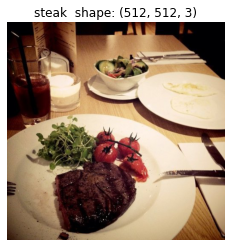

In [5]:
show_random_image( 'pizza_steak/train', 'steak')

In [10]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# Proprocessing the DAta using ImageDataGenerator

In [6]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2022-07-12 11:31:41.558921: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [12]:
# set Seed
tf.random.set_seed(42)

# Creatin datagen Instances
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# setting directory varibles
train_dir = 'pizza_steak/train'
valid_dir = 'pizza_steak/test'

# Loading the data from directory
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 16,
                                               target_size = (244,244),
                                               class_mode = 'binary',
                                               seed = 42)

valid_data = train_datagen.flow_from_directory(directory = valid_dir,
                                               batch_size = 16,
                                               target_size = (244,244),
                                               class_mode = 'binary',
                                               seed = 42)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


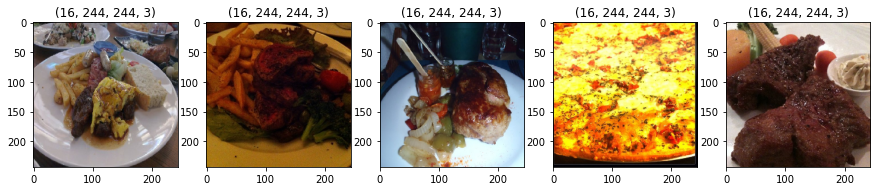

In [13]:
plt.figure(figsize  = (15,8))
for i in range(5):
    plt.subplot(1,5, i+1)
    img, label = train_data.next()
    plt.title(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
plt.show()

# Making CNN Model

In [15]:
# Creating CNN
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout


model = keras.models.Sequential([
                                 Conv2D(filters = 5, kernel_size = 3, activation = 'relu', input_shape = (244,244,3)),
                                 MaxPool2D( pool_size = 2, padding = 'valid'),
                                #  Dropout(.1),

                                 
                                 Conv2D(filters = 5, kernel_size = 3, activation = 'relu', input_shape = (244,244,3)),
                                 MaxPool2D( pool_size = 2, padding = 'valid'),
                                #  Dropout(.2),

                                 
                                 Conv2D(filters = 5, kernel_size = 3, activation = 'relu', input_shape = (244,244,3)),
                                 MaxPool2D( pool_size = 2, padding = 'valid'),
                                #  Dropout(.3),

                                 
                                 Flatten(),
                                #  Dense(20, activation = 'relu'),
                                #  Dropout(.3),

                                #  Dense(10, activation = 'relu'),
                                #  Dropout(.3),

                                 Dense(1, activation  =  'sigmoid')
         
])

#setting Metrics
recall = tf.metrics.Recall()
precision = tf.metrics.Precision()

# Compiling
model.compile( optimizer= tf.keras.optimizers.Adam(),
              loss = keras.losses.BinaryCrossentropy(),
              metrics = ['Accuracy', recall, precision])

# Fitting the Model

history = model.fit( train_data, 
                    epochs = 20
#                     , steps_per_epoch=len(train_data), 
                    , validation_data = valid_data
#                     , validation_steps = len(valid_data)
                   )

Epoch 1/20


2022-07-12 11:36:29.840800: E tensorflow/stream_executor/cuda/cuda_dnn.cc:336] Could not create cudnn handle: CUDNN_STATUS_INTERNAL_ERROR
2022-07-12 11:36:29.842711: E tensorflow/stream_executor/cuda/cuda_dnn.cc:336] Could not create cudnn handle: CUDNN_STATUS_INTERNAL_ERROR
2022-07-12 11:36:29.842739: W tensorflow/core/framework/op_kernel.cc:1763] OP_REQUIRES failed at conv_ops_fused_impl.h:697 : Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.


UnknownError: 2 root error(s) found.
  (0) Unknown:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential_3/conv2d_9/Relu (defined at tmp/ipykernel_166144/817362238.py:43) ]]
  (1) Unknown:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential_3/conv2d_9/Relu (defined at tmp/ipykernel_166144/817362238.py:43) ]]
	 [[assert_greater_equal_1/Assert/AssertGuard/pivot_f/_31/_105]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_5253]

Function call stack:
train_function -> train_function


In [17]:
import pandas as pd
from datetime import datetime as dt

data = pd.DataFrame(history.history)
data.head()

,loss,Accuracy,recall_2,precision_2,val_loss,val_Accuracy,val_recall_2,val_precision_2
0,0.667620,0.634667,0.686667,0.621981,0.586092,0.734,0.648,0.782609
1,0.560172,0.732667,0.697333,0.750359,0.502831,0.772,0.708,0.811927
2,0.522316,0.748000,0.741333,0.751351,0.463278,0.786,0.704,0.842105
3,0.478575,0.772000,0.744000,0.788136,0.409555,0.830,0.820,0.836735
4,0.457359,0.794667,0.780000,0.803571,0.393606,0.836,0.856,0.823077


# Plotting Model Performance


Text(0, 0.5, 'Performance')

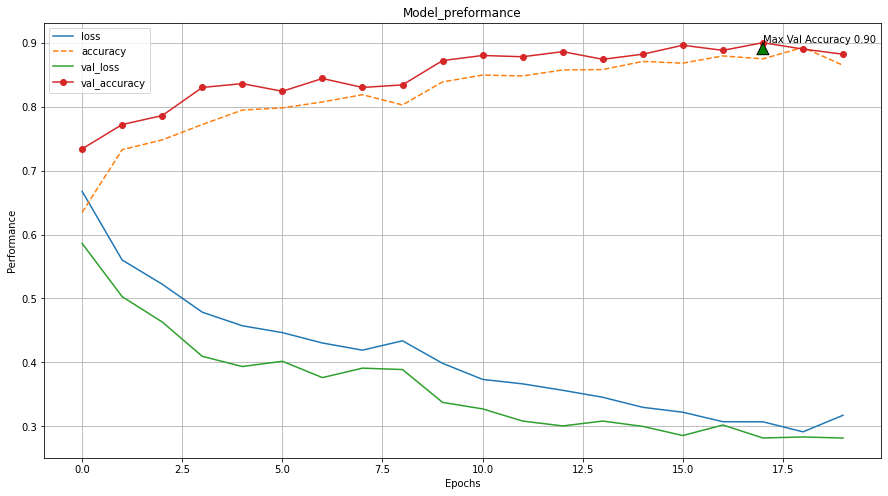

In [48]:
# Plotting Model Performance
fig, ax = plt.subplots(1,1,figsize=(15,8))
ax.grid(True)


ax.plot(data.loss, label = 'loss')
ax.plot(data.Accuracy ,linestyle = 'dashed' ,label = 'accuracy')
# plt.plot(data.precision_1, label = 'precision')
# plt.plot(data.recall_1 ,linestyle = 'dashed' ,label = 'recall')

ax.plot(data.val_loss, label = 'val_loss')
ax.plot(data.val_Accuracy, marker = 'o', label = 'val_accuracy')
# plt.plot(data.val_precision_1, label = 'val_precision')
# plt.plot(data.val_recall_1, marker = 'o', label = 'val_recall')


# plot max accuracy point
max_accur = data.val_Accuracy.max()
max_accur_x = data[data.val_Accuracy == data.val_Accuracy.max()].index.values

ax.annotate(f'Max Val Accuracy {max_accur:.2f}', xy=(max_accur_x, max_accur),
            arrowprops=dict(facecolor='green', shrink=55),
            )

plt.legend()
plt.title('Model_preformance')
plt.xlabel('Epochs')
plt.ylabel('Performance')
# plt.savefig(f'Model_preformance_with_dropout_{dt.now()}.jpg')

In [25]:
data.val_Accuracy.max()

0.8999999761581421

In [34]:
data[data.val_Accuracy == data.val_Accuracy.max()].index.values

array([17])